In [1]:
from nearline_helpers import *
%jsroot on

Welcome to JupyROOT 6.26/10


In [2]:
runs = {
    # name, run number(s), true energy, amplitude bounds, integral bounds
    'Intrinsic':[[320], 0.6, (150,190), (6500,7500)],
    'Co-60 Lower':[[319], 1.173, (260,280), (12600,13100)],
    'Co-60 Upper':[[319], 1.332, (285,310), (14200, 15000)],
    'Co-60 Pileup':[[319], 1.332+1.173, (420, 460), (24000,26000)],
    '17.6':[[305], 17.6, (840,900), (78000,85000)],
    'Cosmic':[[318], 22, (980,1100), (95000, 110000)],
}

In [5]:
output = {}
for name, (these_runs, true_energy, a_range, i_range) in runs.items():
    t = load_chain(these_runs)
    print(t.GetEntries())
    # ha = r.TH1D(f"ha","amplitudes", 100, *a_range)
    # ha.SetLineColor(2)
    # hi = r.TH1D(f"hi","integrals", 100, *i_range)
    # hi.SetLineColor(2)

    ha_full = r.TH1D(f"ha_full","amplitudes", 1000, 0,2000)
    hi_full = r.TH1D(f"hi_full","integrals", 1000, 0,200000)

    cut = f'integrals.amcNum == 1 && integrals.channelTag == 0'
    # t.Draw("integrals.amplitude>>ha",cut,"goff")
    # t.Draw("integrals.integral>>hi",cut,"goff")
    t.Draw("integrals.amplitude>>ha_full",cut,"goff")
    t.Draw("integrals.integral>>hi_full",cut,"goff")

    ha = ha_full.Clone("ha")
    hi = hi_full.Clone("hi")
    ha.GetXaxis().SetRangeUser(*a_range)
    hi.GetXaxis().SetRangeUser(*i_range)

    output[name] = (true_energy, ha.GetMean(), hi.GetMean())

    c = r.TCanvas()
    c.Divide(2)
    c.cd(1)
    ha_full.Draw()
    ha.Draw("same")
    c.cd(2)
    hi_full.Draw()
    hi.Draw("same")

    c.Print(f"./{name}.pdf")
    c.Draw()
    # break

212102
55953
55953
55953
446206
213486


Warning in <TFile::Init>: file ../bin/run00320_00000.mid.root probably not closed, trying to recover
Info in <TFile::Recover>: ../bin/run00320_00000.mid.root, recovered key TProcessID:ProcessID0 at address 246
Warning in <TFile::Init>: successfully recovered 1 keys
Error in <TChain::LoadTree>: Cannot find tree with name tree in file ../bin/run00320_00000.mid.root
Warning in <TROOT::Append>: Replacing existing TH1: ha_full (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hi_full (Potential memory leak).
Info in <TCanvas::Print>: pdf file ./Intrinsic.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: ha_full (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hi_full (Potential memory leak).
Info in <TCanvas::Print>: pdf file ./Co-60 Lower.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: ha_full (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hi_full (Potential 

Intrinsic 0.6 169.95784413298125 6996.0053577056415
Co-60 Lower 1.173 270.5130325814536 12905.566600397615
Co-60 Upper 1.332 296.21623382667786 14598.426129632764
Co-60 Pileup 2.505 439.33949945593037 25030.1775147929
17.6 17.6 866.9127395444136 80308.04953560371
Cosmic 22 1038.857343423621 102173.69349299173


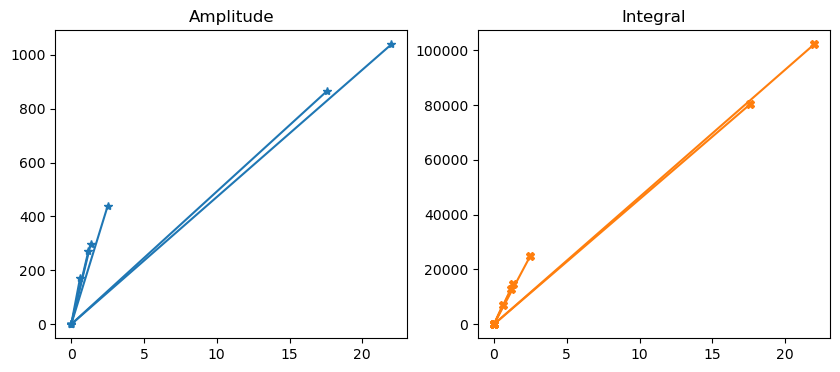

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
for name, (truth, ea, ei) in output.items():
    print(name, truth, ea, ei)
    ax[0].plot([0,truth],[0,ea], color='C0', marker='*')
    ax[1].plot([0,truth],[0,ei], color='C1', marker='X')

ax[0].set_title("Amplitude")
ax[1].set_title("Integral")
plt.show()

Intrinsic 0.6 169.95784413298125 6996.0053577056415
Co-60 Lower 1.173 270.5130325814536 12905.566600397615
Co-60 Upper 1.332 296.21623382667786 14598.426129632764
Co-60 Pileup 2.505 439.33949945593037 25030.1775147929
17.6 17.6 866.9127395444136 80308.04953560371
Cosmic 22 1038.857343423621 102173.69349299173


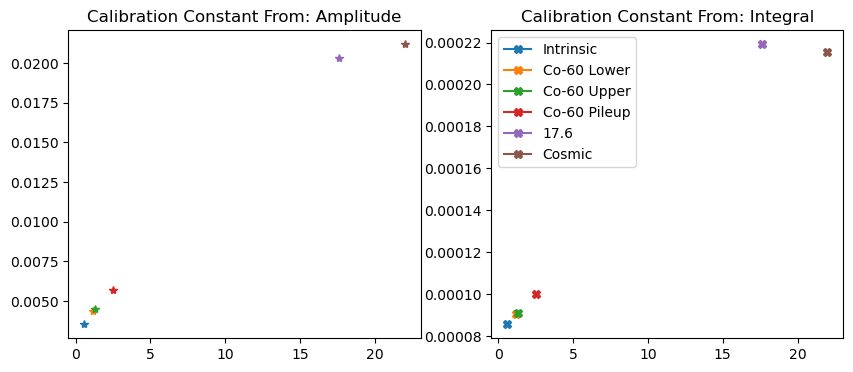

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
for name, (truth, ea, ei) in output.items():
    print(name, truth, ea, ei)
    ax[0].plot([truth],[truth/ea], marker='*',label=name)
    ax[1].plot([truth],[truth/ei], marker='X',label=name)

ax[0].set_title("Calibration Constant From: Amplitude")
ax[1].set_title("Calibration Constant From: Integral")
ax[1].legend()
plt.show()